In [1]:
!pip show tornado

Name: tornado
Version: 6.2
Summary: Tornado is a Python web framework and asynchronous networking library, originally developed at FriendFeed.
Home-page: http://www.tornadoweb.org/
Author: Facebook
Author-email: python-tornado@googlegroups.com
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages
Requires: 
Required-by: ipykernel, jupyter_client, jupyter_server, nbclassic, notebook, terminado


In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd


# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Preprocesado y modelado
plt.rcParams["figure.figsize"] = (10,8)

# input

In [3]:
columnas = ["Customer_Number", 
            "Offer_Accepted", 
            "Reward", 
            "Mailer_Type", 
            "Income_Level", 
            "Bank_Accounts_Open",
            "Overdraft_Protection",
            "Credit_Rating",
            "Credit_Cards_Held",
            "Homes_Owned",
            "Household_Size",
            "Own_Your_Home",
            "AVG_Balance_Q1",
            "AVG_Balance_Q2",
            "AVG_Balance_Q3",
            "AVG_Balance_Q4",
            "Balance"
            ]

In [4]:
df = pd.read_csv('datos/creditcardmarketing.csv', header = None,
                 names=columnas)
df.head(1)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


# EDA
1. ver que tengo en el df y los tipos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  AVG_Balance_Q1        17976 non-null  float64
 13  AVG_Balance_Q2        17976 non-null  float64
 14  AVG_Balance_Q3        17976 non-null  float64
 15  AVG_Balance_Q4     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
AVG_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
AVG_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
AVG_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
AVG_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


- variables continuas:
    - `Offer_Accepted` -> booleana, es la variable respuesta
    - `Reward` -> categórica, son tres tipos: 
        - 'Air Miles'
        - 'Cash Back' 
        - 'Points'
    - `Mailer_Type`-> categórica, dos tipos:
        - 'Postcard' 
        - 'Letter'
    - `Income_Level` -> categórcia, dos tipos:
        - Medium
        - High
        - Low
    - `Overdraft_Protection` -> booleana
    - `Credit_Rating` -> categórica, tres variables:
        - Medium
        - High
        - Low
    - `Own_Your_Home`-> booleana
- variable numérica:
    - `Customer_Number` -> continua
    - `Bank_Accounts_Open` -> discreta
    - `Credit_Cards_Held` -> discreta
    - `Homes_Owned` -> discreta
    - `Household_Size` ->discreta
    - `AVG_Balance_Q1` -> continua
    - `AVG_Balance_Q2` -> continua
    - `AVG_Balance_Q3` -> continua
    - `AVG_Balance_Q4` -> continua
    - `Balance` -> continua

2. número de nulos en el dataset

In [8]:
df.isnull().sum() / df.shape[0]

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
AVG_Balance_Q1          0.001333
AVG_Balance_Q2          0.001333
AVG_Balance_Q3          0.001333
AVG_Balance_Q4          0.001333
Balance                 0.001333
dtype: float64

3. check valores duplicados

In [9]:
df.duplicated().sum() / df.shape[0]

0.0

## variables continuas

In [10]:
import psutil
print(psutil.virtual_memory())

svmem(total=8589934592, available=1959116800, percent=77.2, used=3116318720, free=59555840, active=1914126336, inactive=1838907392, wired=1202192384)


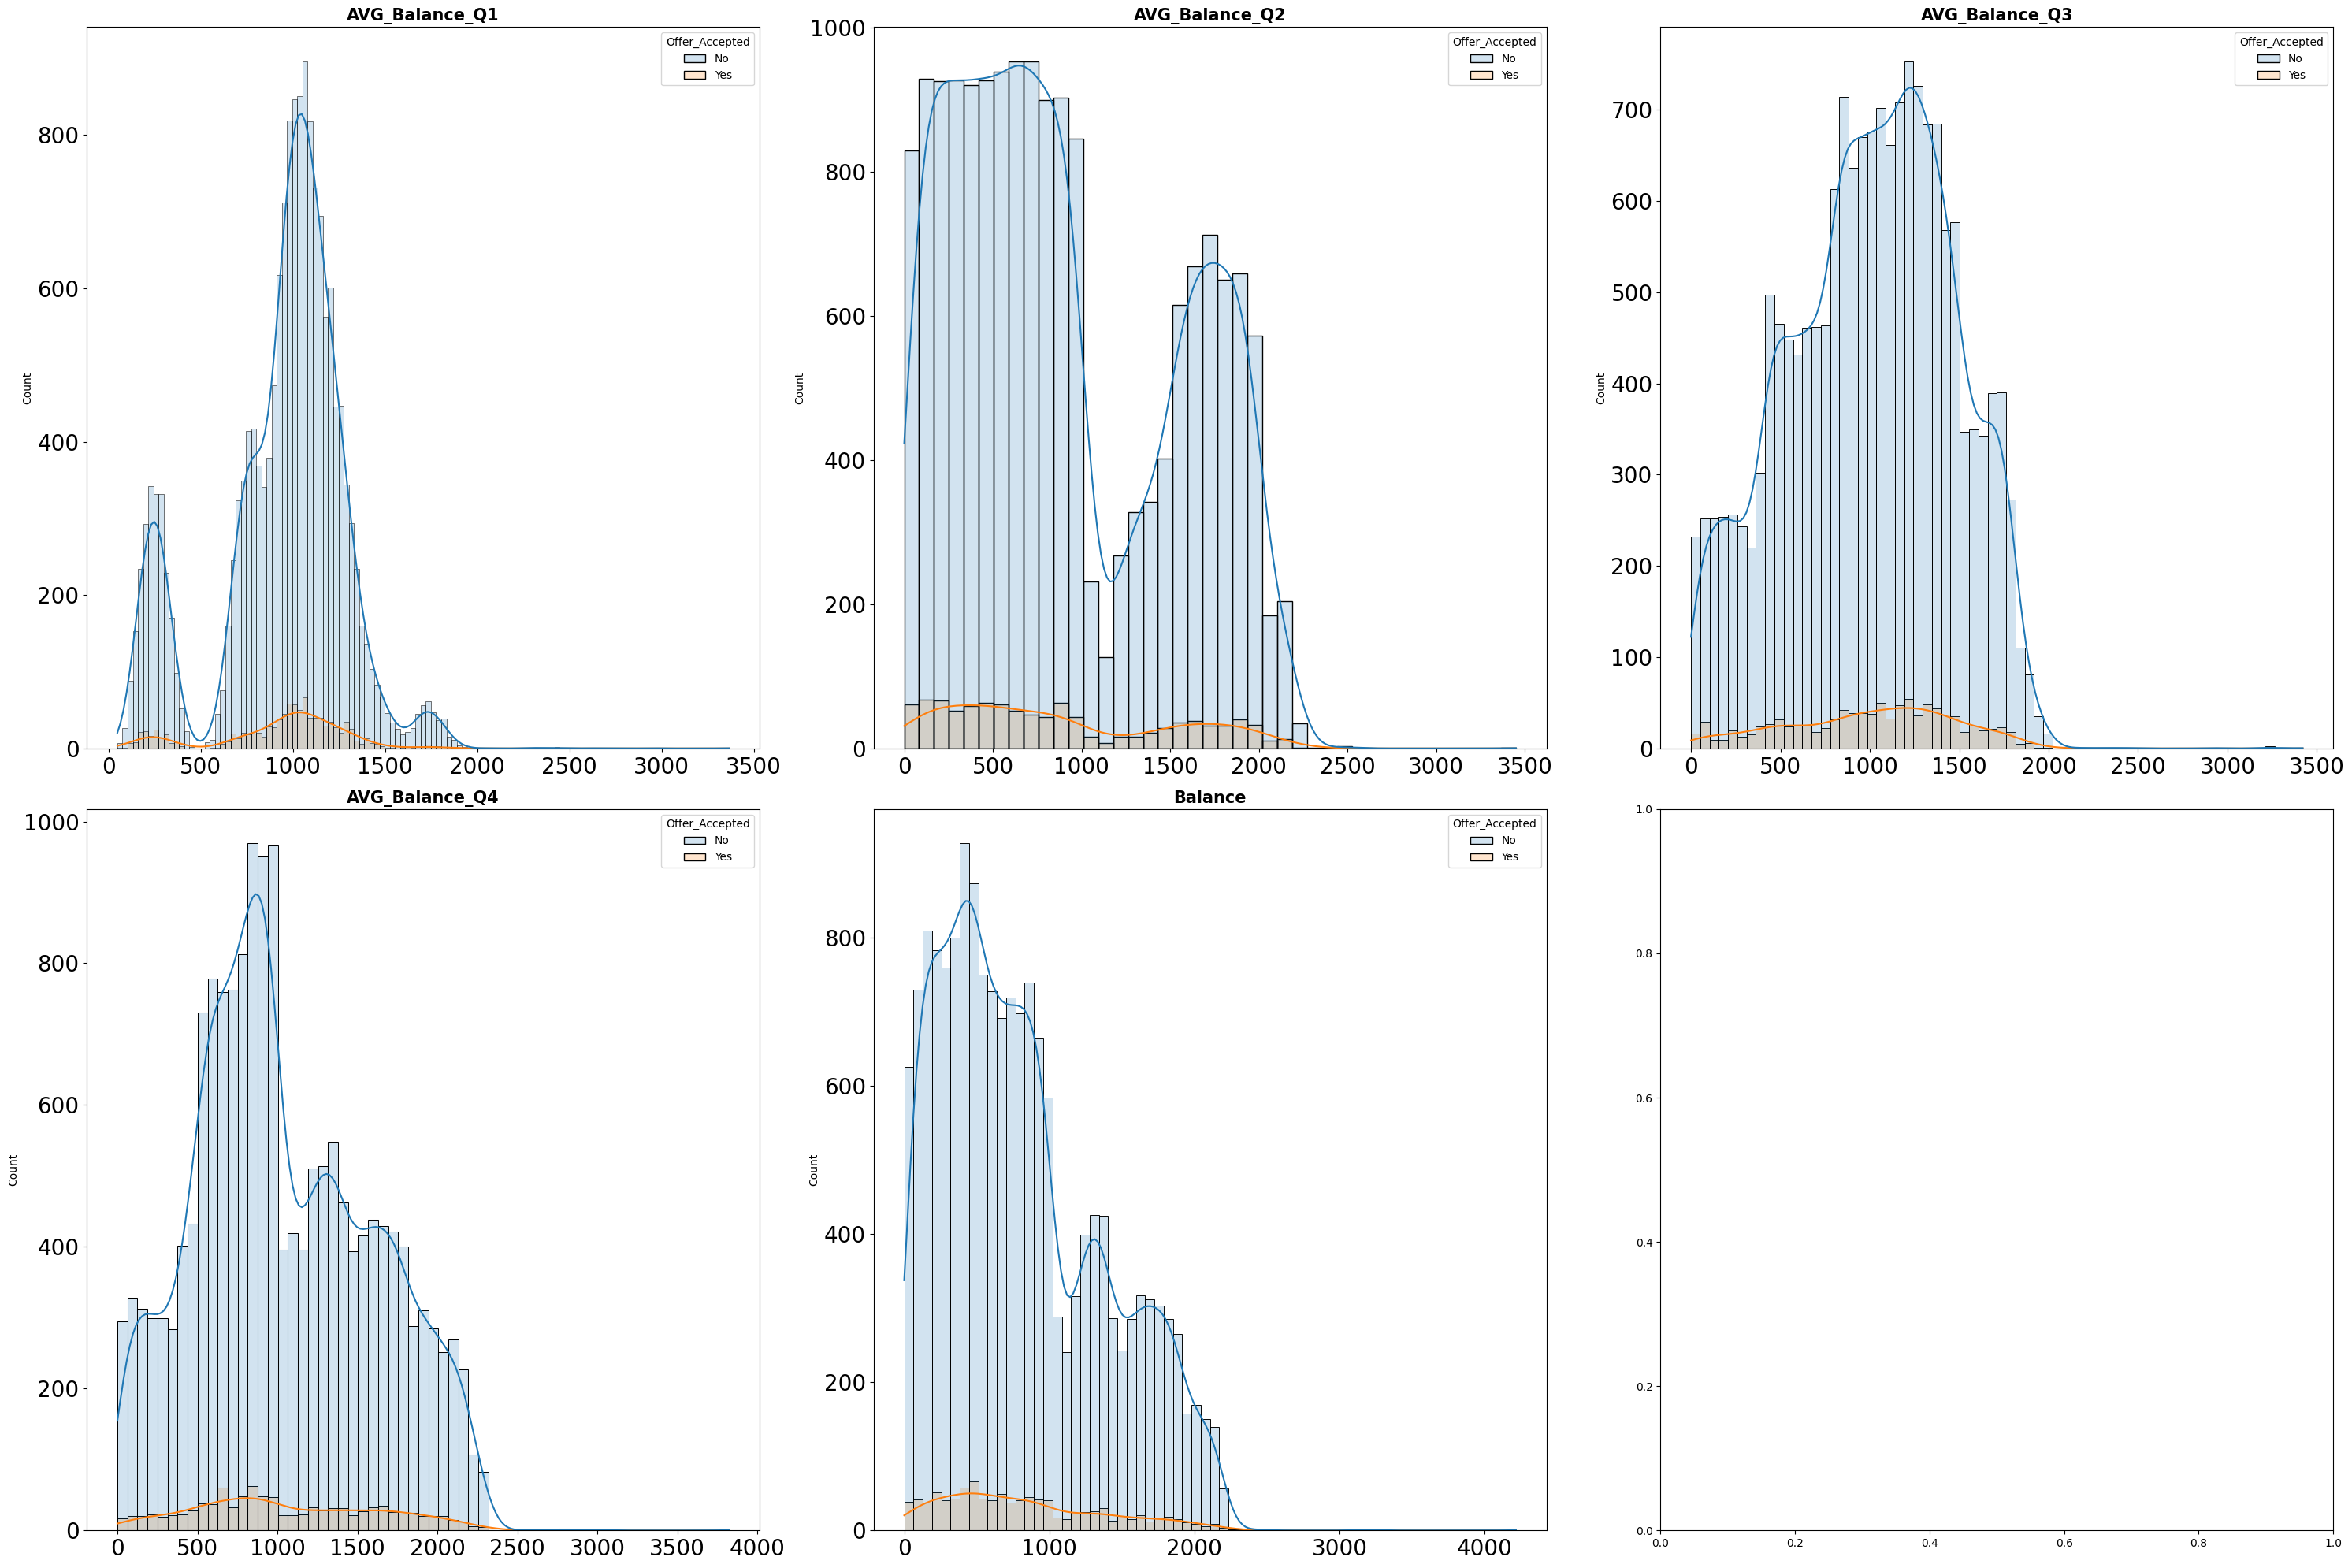

In [24]:
# Gráfico de distribución para cada variable numérica continua

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop(['Customer_Number', 'Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned'], axis = 1).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        alpha = 0.2, 
        ax = axes[i],
        hue = df['Offer_Accepted']
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();# Gráfico de distribución para cada variable numérica

Las variables predictoras numéricas están desviadas hacia la izquierda -- la mayor parte de los valores son pequeños y presentan outliers de valor superior. Esto lo veremos con más profundidad en la gestión de outliers.

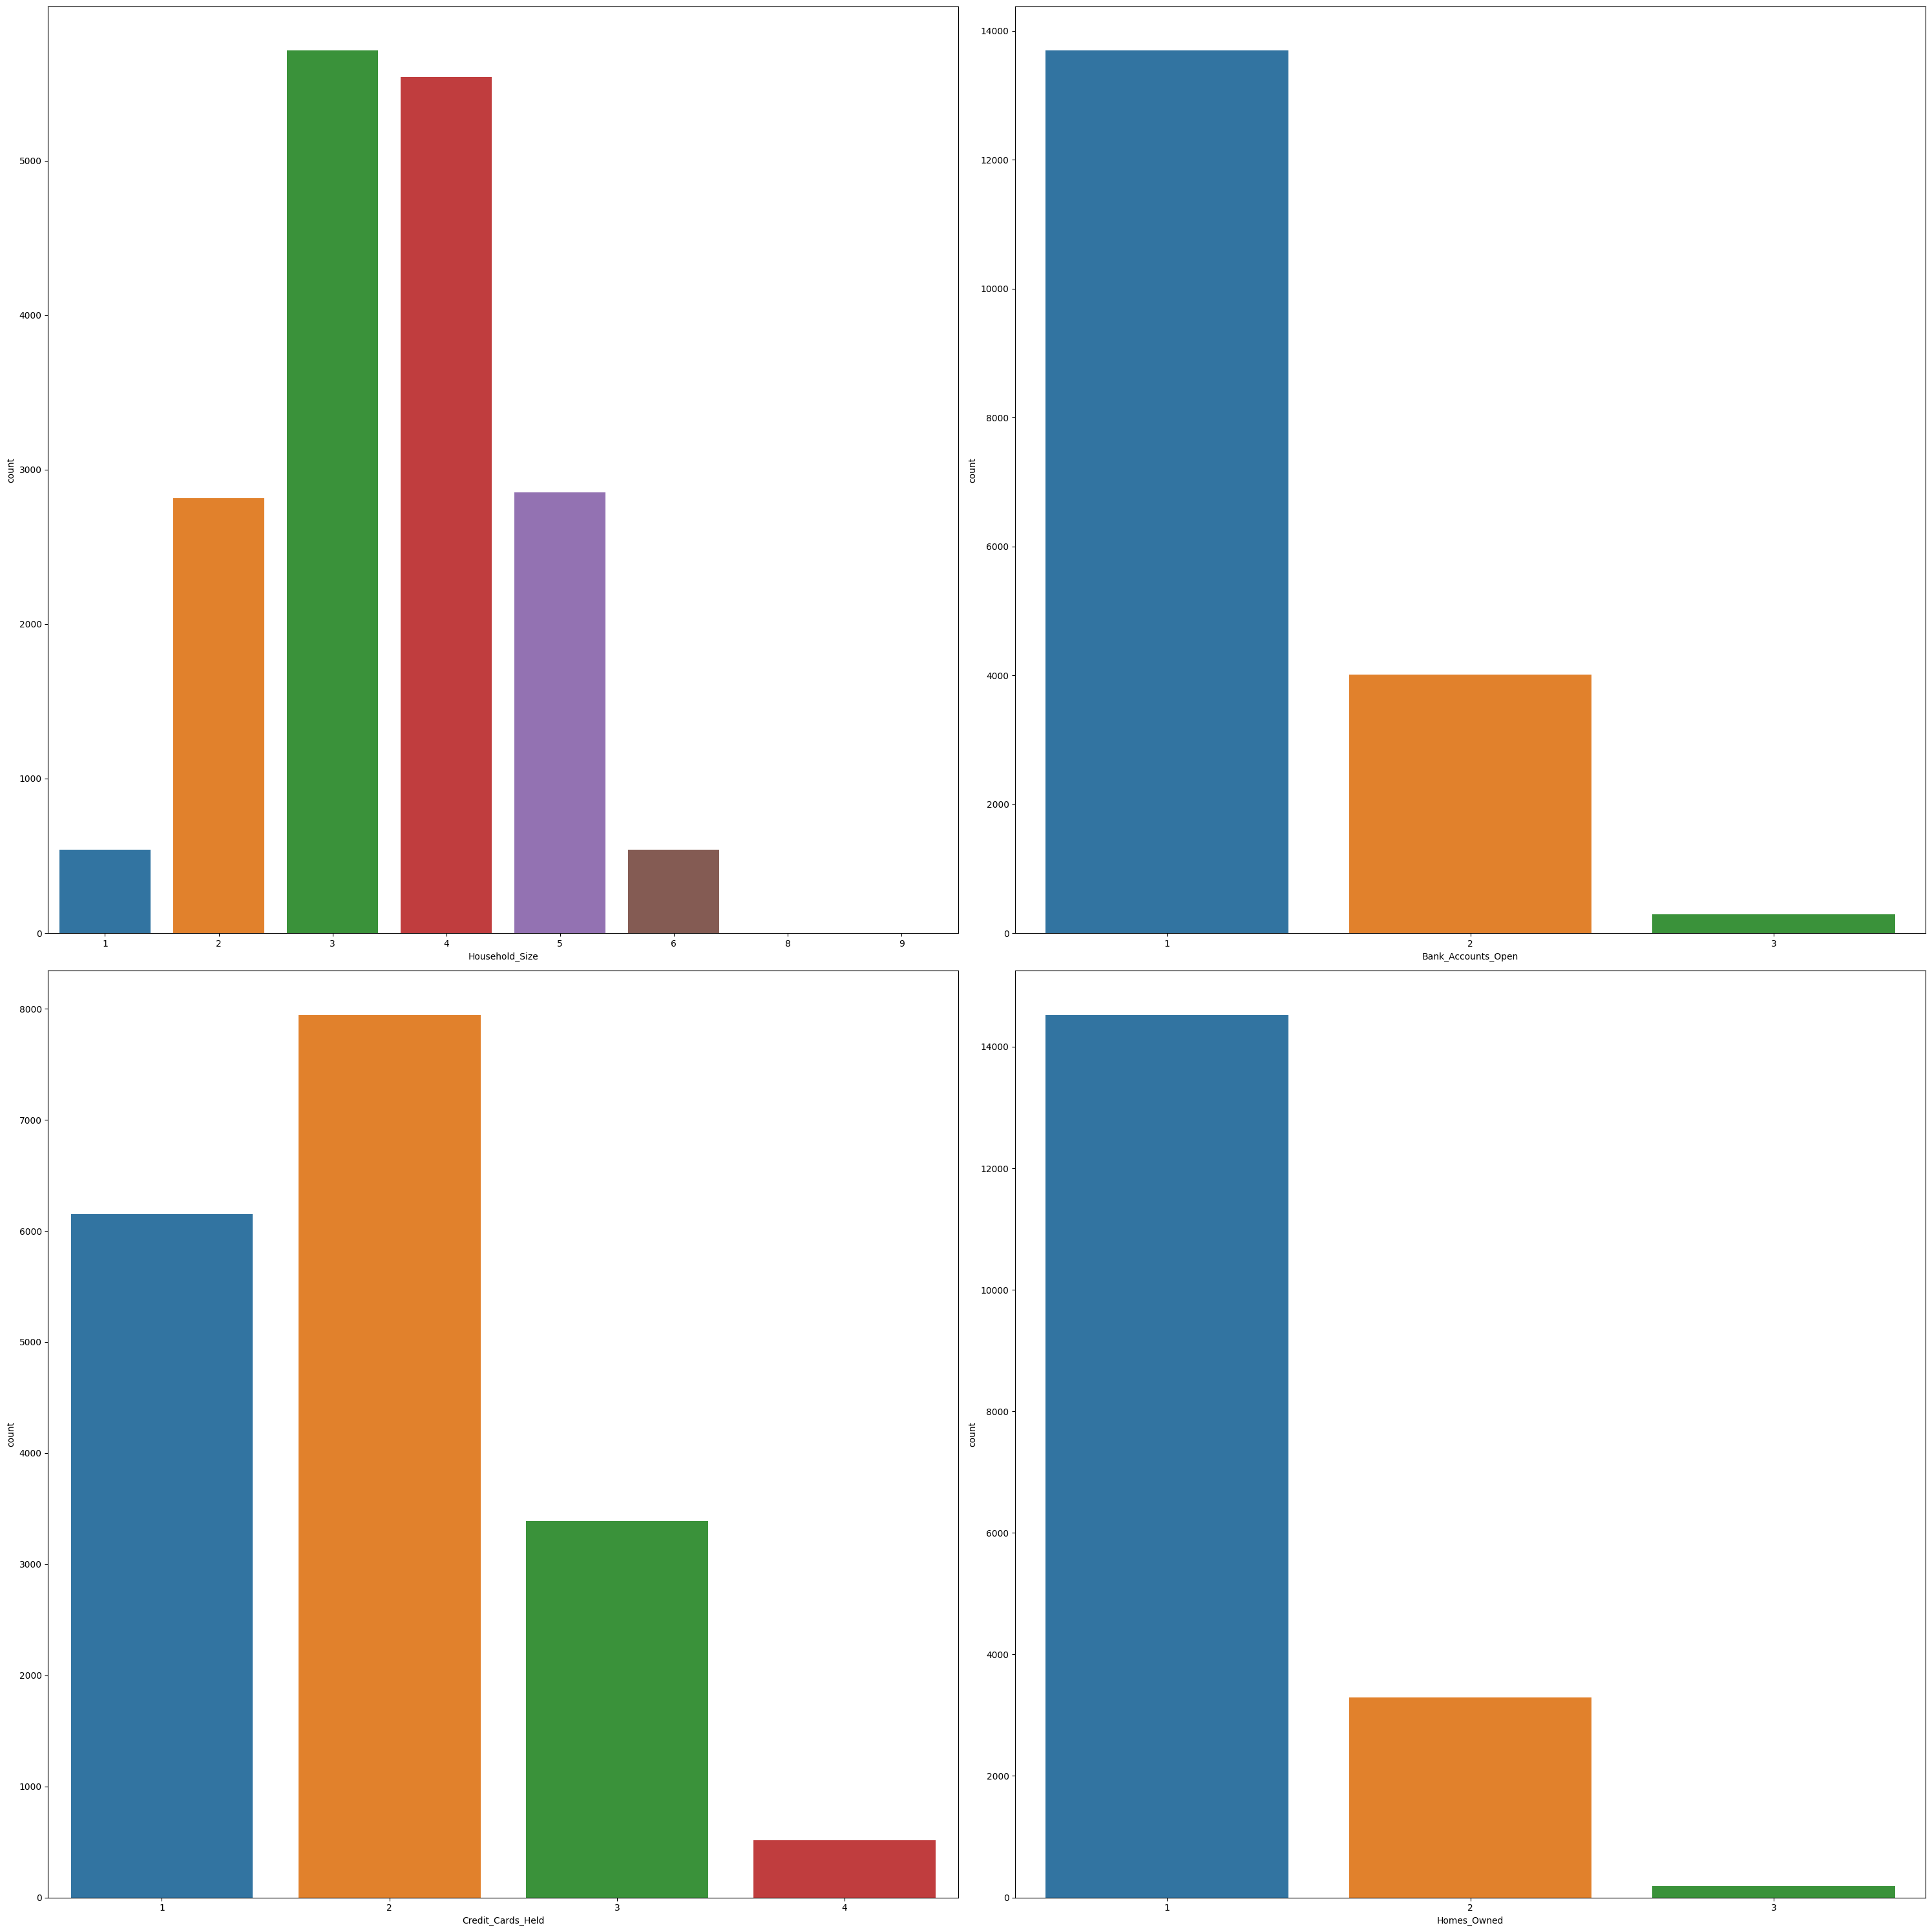

In [25]:
# Gráfico de distribución para cada variable numérica discreta

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 30))

axes = axes.flat

columnas_numeric_disc = df[['Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned']].columns

for i, colum in enumerate(columnas_numeric_disc):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

De estas variables, al ser pocas categorías, haremos un encoding como si fueran variables categóricas.

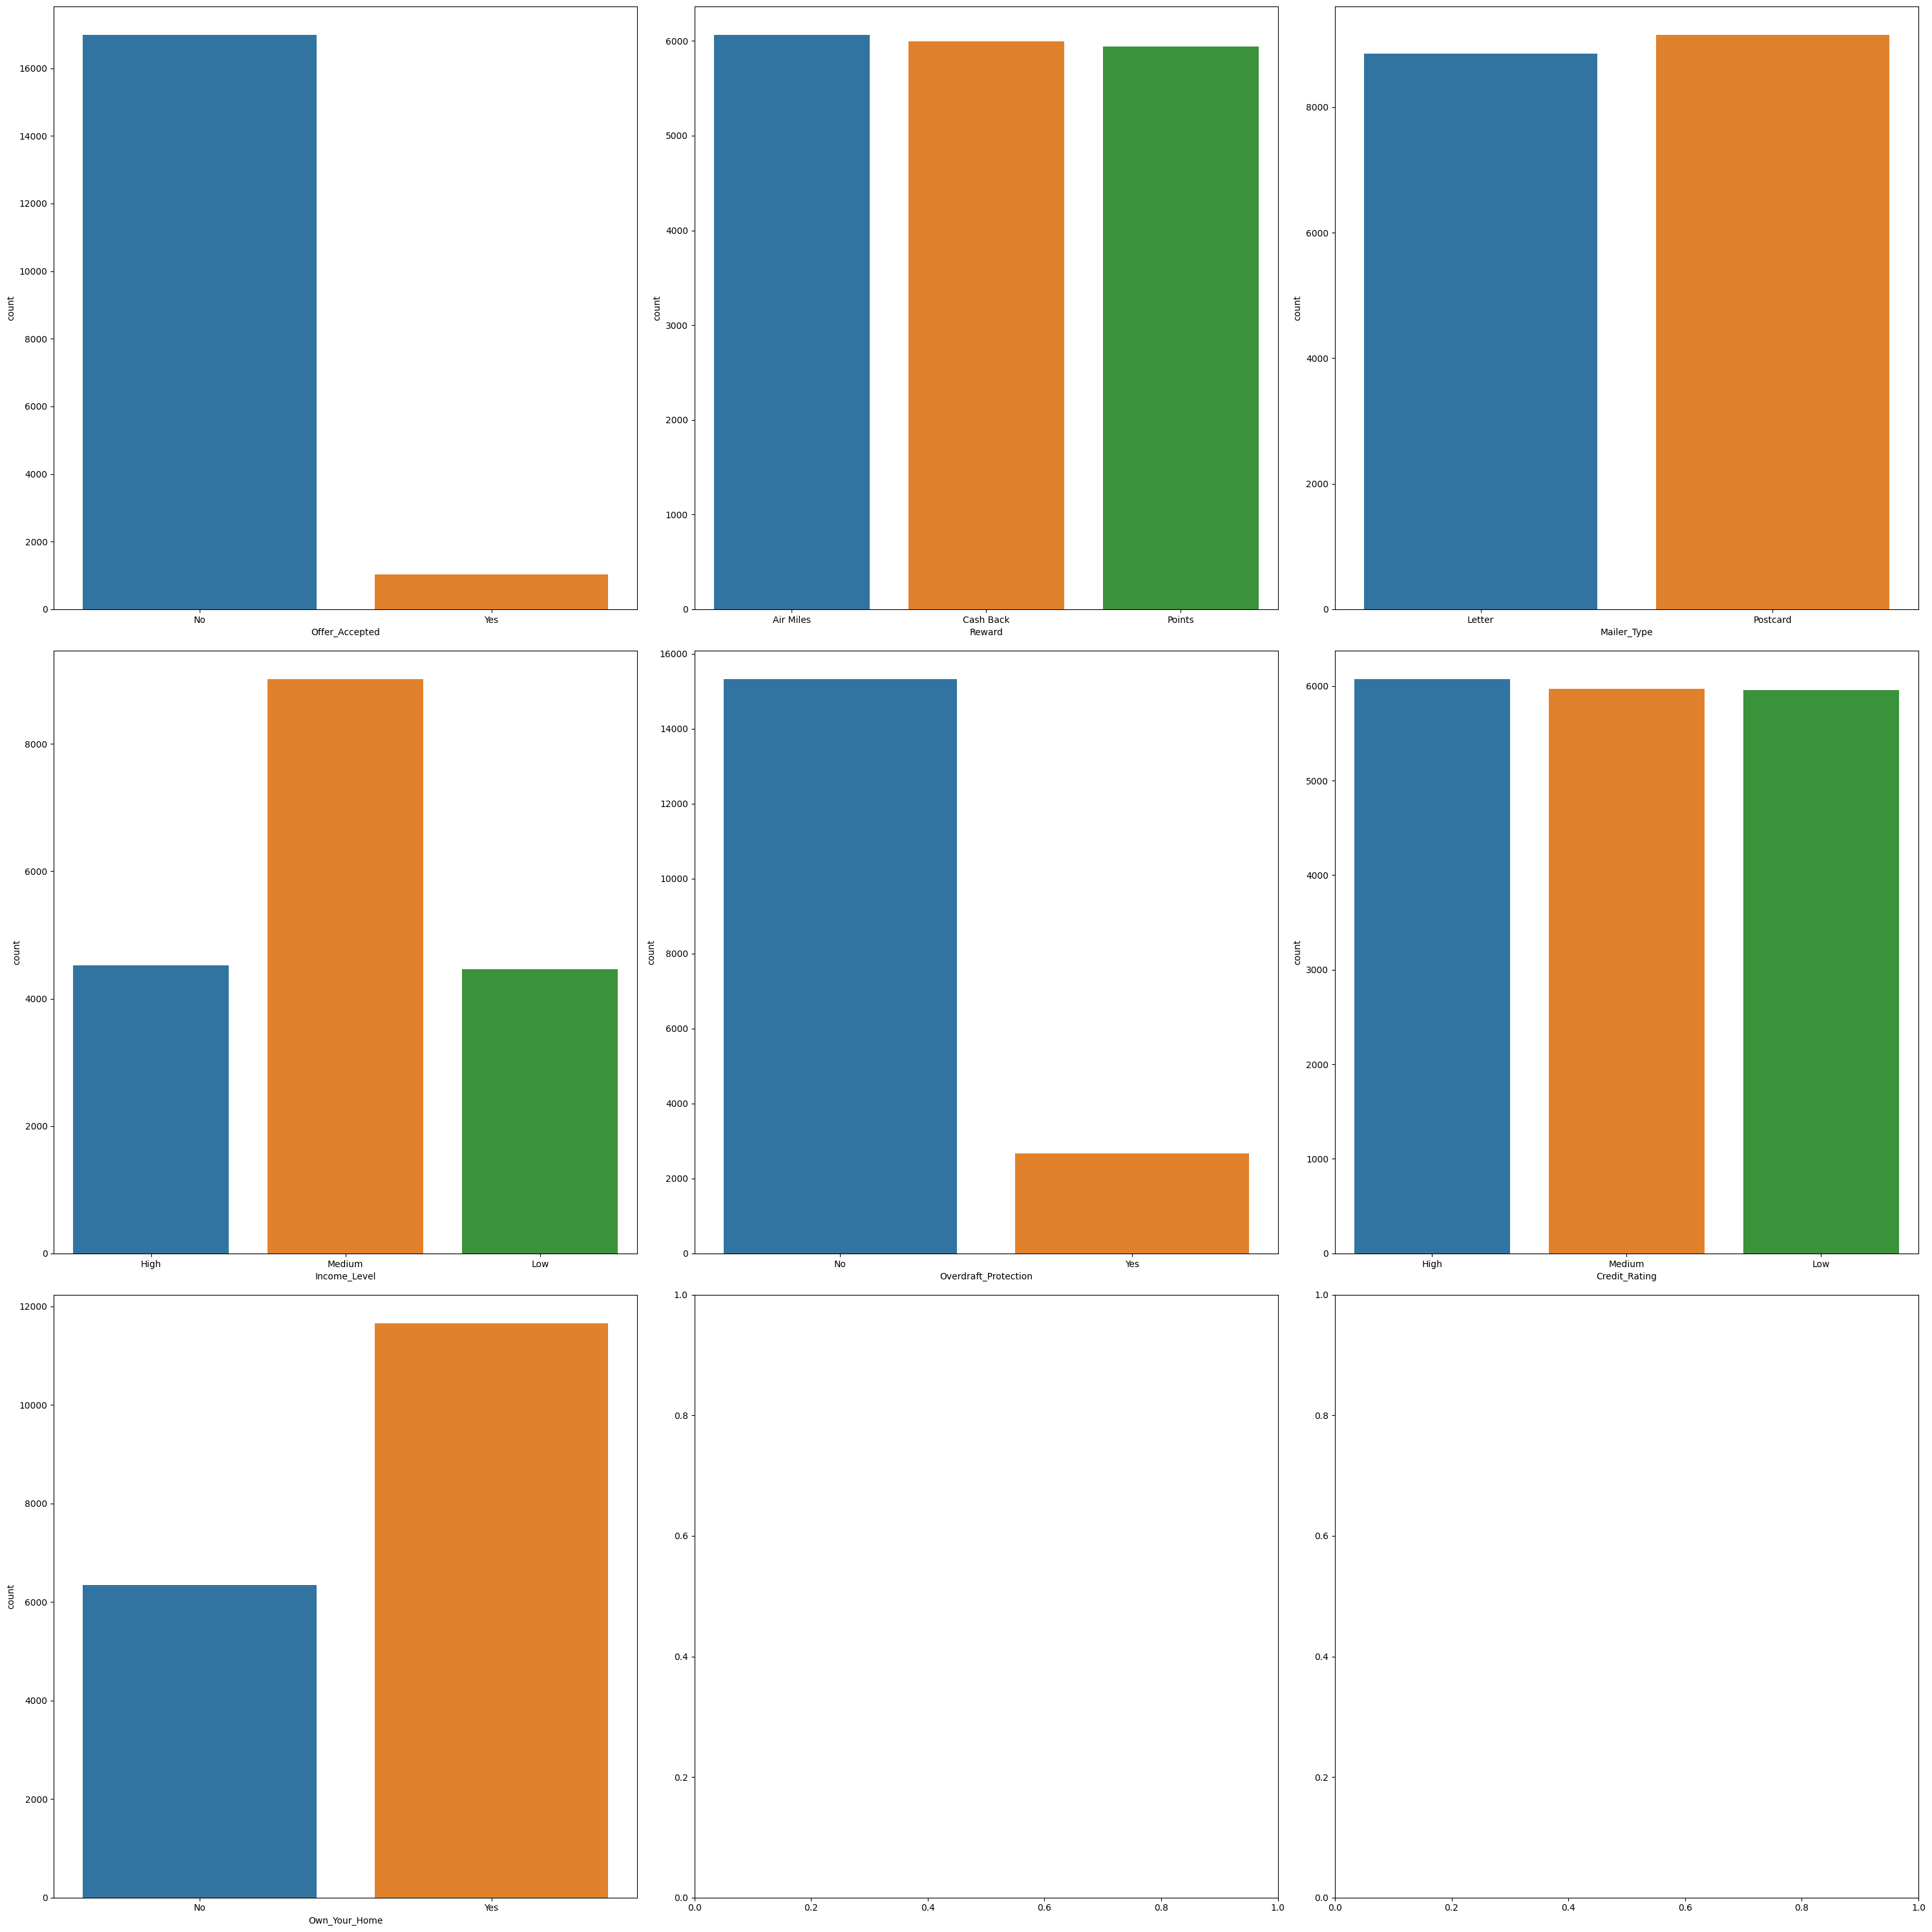

In [26]:
# Gráfico de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 30))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
                x = df[colum], 
                ax = axes[i])

fig.tight_layout();

Como vemos, la variable respuesta está muy desbalanceada.

# gestión nulos

# gestión outliers